In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
X_train = np.array([
    [2, 60], 
    [3, 70], 
    [5, 80], 
    [1, 50], 
    [4, 85], 
    [6, 90], 
    [2, 55], 
    [7, 95], 
    [3, 65], 
    [8, 100]
])
y_train = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [3]:
m, n = X_train.shape
positive = np.zeros((m, n))
negative = np.zeros((m, n))

for i in range(m):
    for j in range(n):
        if y_train[i] == 1:
            positive[i, j] = X_train[i, j]
        elif y_train[i] == 0:
            negative[i, j] = X_train[i, j]

X_positive = positive[~np.all(positive == 0, axis=1)]
X_negative = negative[~np.all(negative == 0, axis=1)]

print("Positive inputs : \n", X_positive)
print("Negative inputs : \n", X_negative)



Positive inputs : 
 [[  5.  80.]
 [  4.  85.]
 [  6.  90.]
 [  7.  95.]
 [  8. 100.]]
Negative inputs : 
 [[ 2. 60.]
 [ 3. 70.]
 [ 1. 50.]
 [ 2. 55.]
 [ 3. 65.]]


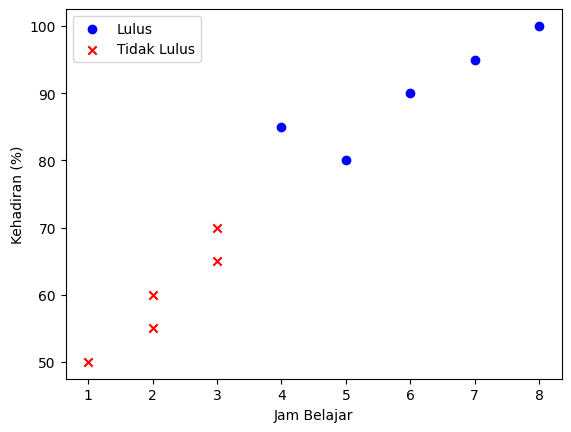

In [4]:
plt.scatter(X_positive[:, 0], X_positive[:, 1], marker="o", c="b", label="Lulus")
plt.scatter(X_negative[:, 0], X_negative[:, 1], marker="x", c="r", label="Tidak Lulus")
plt.legend()
plt.xlabel("Jam Belajar")
plt.ylabel("Kehadiran (%)")
plt.show()


In [5]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))

    return g

In [6]:
number = 5
print(f"sigmoid({number}) = {sigmoid(number)}")

sigmoid(5) = 0.9933071490757153


In [7]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    loss_sum = 0

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        loss_sum += loss
    
    total_cost = loss_sum / m

    return total_cost

In [8]:
n = X_train.shape[1]
init_w = np.zeros(n)
init_b = 0

cost = compute_cost(X_train, y_train, init_w, init_b)
print("cost at initial w, b (zeros) = ", cost)

cost at initial w, b (zeros) =  0.6931471805599453


In [9]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] = (f_wb - y[i]) * X[i, j]
            dj_dw += dj_dw[j]

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [10]:
dj_dw_tmp, dj_db_tmp = compute_gradient(X_train, y_train, init_w, init_b)
print("dj_dw at initial w, b (zeros) = ", dj_dw_tmp)
print("dj_db at initial w, b (zeros) = ", dj_db_tmp)

dj_dw at initial w, b (zeros) =  [ -5.8 -10. ]
dj_db at initial w, b (zeros) =  0.0


In [11]:
def gradient_descent(X, y, w_in, b_in, cost_f, gradient_f, alpha, iters):
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []

    for i in range(1, iters+1):
        dj_dw, dj_db = gradient_f(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_f(X, y, w, b)
            J_history.append(cost)

        if i % math.ceil(iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history


In [12]:
alpha = 0.03
iterations = 60000

w, b, _ = gradient_descent(
    X_train,
    y_train,
    init_w,
    init_b,
    compute_cost,
    compute_gradient,
    alpha,
    iterations)

print("w, b after gradient descent: ", w, b)

Iteration 6000: Cost     0.04
Iteration 12000: Cost     0.03
Iteration 18000: Cost     0.02
Iteration 24000: Cost     0.02
Iteration 30000: Cost     0.02
Iteration 36000: Cost     0.02
Iteration 42000: Cost     0.02
Iteration 48000: Cost     0.02
Iteration 54000: Cost     0.01
Iteration 60000: Cost     0.01
w, b after gradient descent:  [0.28391119 0.48950205] -37.67131456992253


In [13]:
m = X_train.shape[0]
y_hat = np.zeros(m)

for i in range(m):
    z = np.dot(X_train[i], w) + b
    f_wb = sigmoid(z)
    y_hat[i] = 1 if f_wb >= 0.5 else 0
    print(f"prediction: {int(y_hat[i])}, target value: {y_train[i]}")

prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 1, target value: 1


In [14]:
X_test = np.array([4, 60])
z = np.dot(X_test, w) + b
y_pred = "Lulus" if sigmoid(z) >= 0.5 else "Tidak Lulus"
print(f"Siswa dengan waktu belajar {X_test[0]} jam dan {X_test[1]}% kehadiran")
print("Prediksi Kelulusan Siswa : ", y_pred)

Siswa dengan waktu belajar 4 jam dan 60% kehadiran
Prediksi Kelulusan Siswa :  Tidak Lulus
